# Handwritten digit prediction

### Read the image

In [29]:
import cv2
img = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[168, 169, 170, ..., 173, 173, 154],
       [170, 170, 170, ..., 172, 172, 153],
       [170, 171, 170, ..., 172, 172, 153],
       ...,
       [169, 170, 170, ..., 169, 169, 150],
       [168, 170, 170, ..., 170, 169, 150],
       [169, 171, 170, ..., 169, 169, 150]], dtype=uint8)

In [30]:
img.shape

(364, 364)

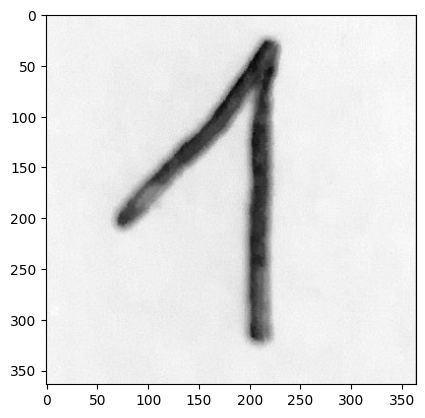

In [31]:
import matplotlib.pyplot as plt 
plt.imshow(img, cmap='gray')
plt.show()

### Inverting the image

In [32]:
img = ~img

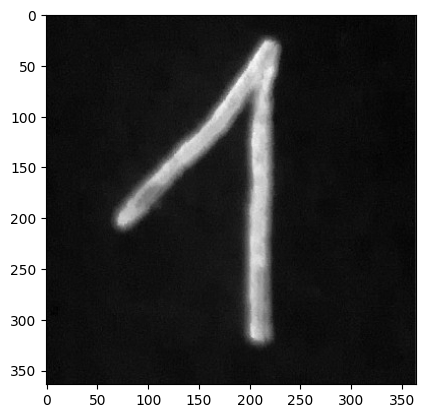

In [33]:
plt.imshow(img, cmap='gray')
plt.show()

### Resize the image to orignal train data i.e. 28, 28

In [34]:
img2 = cv2.resize(img, (28, 28))
img2.shape

(28, 28)

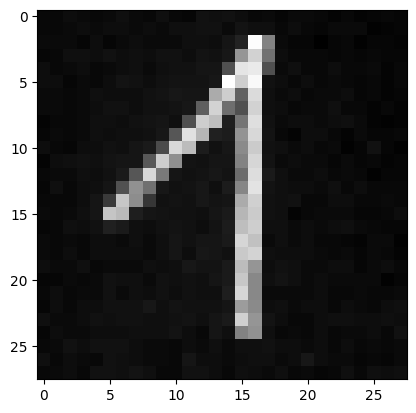

In [35]:
plt.imshow(img2, cmap='gray')
plt.show()

### Reshape image to 1, 28, 28

In [36]:
img2 = img2.reshape(1, 28, 28)
img2.shape

(1, 28, 28)

### Scale the data 

In [37]:
img_scl = img2/255

### Predict the image with probability

In [38]:
from keras.models import load_model
nn = load_model('HandwrittenModel.keras')

In [39]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0

In [40]:
probs = nn.predict(img_scl)
probs

1/1 [==============================] - 0s 87ms/step


array([[3.2058640e-03, 9.9530411e-01, 3.6923045e-06, 5.0626114e-10,
        4.2914337e-04, 2.0156817e-06, 7.6705444e-04, 2.9188999e-05,
        2.5075232e-04, 8.1309872e-06]], dtype=float32)

In [41]:
import numpy as np
pred = np.argmax(probs)
pred

1

In [42]:
max_prob = np.max(probs)
max_prob

0.9953041

### Function to predict the image

In [49]:
def predict_digit(image_path, model_path):
    # Read the image
    import cv2
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Invert the image
    img = ~img
    # Visualize image
    import matplotlib.pyplot as plt 
    plt.imshow(img, cmap='gray')
    plt.title('Orignal Image')
    plt.show()
    # Resize the image to 28, 28
    img2 = cv2.resize(img, (28, 28))
    # Show resized image
    plt.imshow(img2, cmap='gray')
    plt.title('Resized Image')
    plt.show()
    # Reshape image to (1, 28, 28)
    img2 = img2.reshape(1, 28, 28)
    # Scale the image
    img_scl = img2/255 
    # Read the model path
    from keras.models import load_model 
    nn = load_model(model_path)
    prob = nn.predict(img_scl)
    # Get predictions and max prob
    import numpy as np 
    pred = np.argmax(prob)
    max_prob = np.max(prob)
    return pred, round(max_prob,4)

In [50]:
model_path = 'HandwrittenModel.keras'

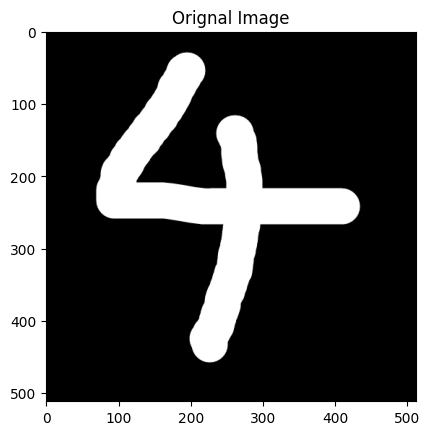

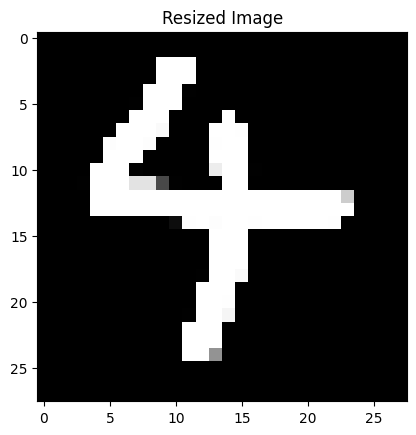

1/1 [==============================] - 0s 92ms/step


(4, 0.9985)

In [52]:
predict_digit('image4.jpg', model_path)

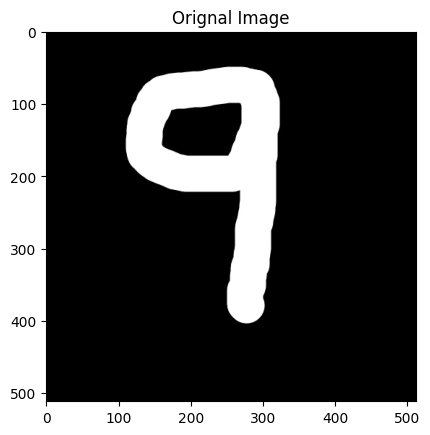

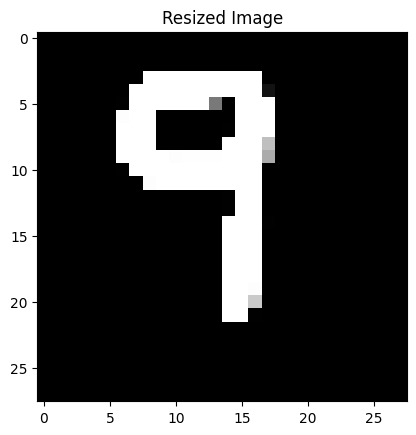

1/1 [==============================] - 0s 87ms/step


(7, 0.959)

In [56]:
predict_digit('Image9.jpg', model_path)

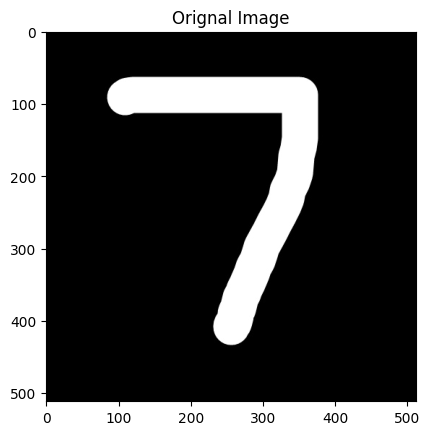

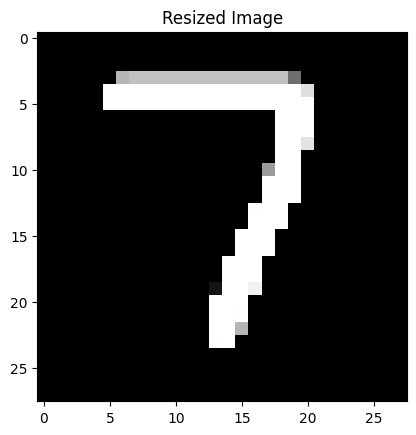

1/1 [==============================] - 0s 81ms/step


(2, 0.9811)

In [54]:
predict_digit('Image7.jpg', model_path)

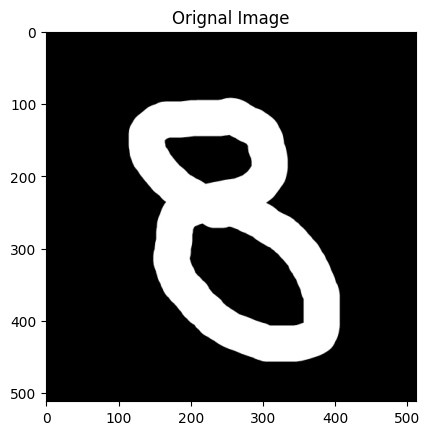

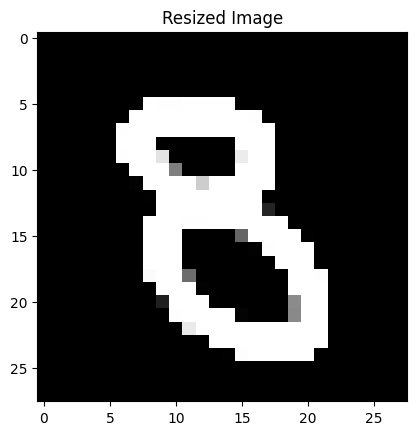

1/1 [==============================] - 0s 81ms/step


(8, 1.0)

In [55]:
predict_digit('Image8.jpg', model_path)